# 지문 촬영 및 컨볼루션 처리,저장

In [3]:
from tkinter import *
from PIL import ImageTk, Image # Pillow
import cv2
import os
import datetime

# GUI 설계
win = Tk() # 인스턴스 생성

win.title("이미지 저장 및 엣지_컨볼루션") # 제목 표시줄 추가
win.option_add("*Font", "맑은고딕 25") # 전체 폰트
#win.resizable(False, False) # x축, y축 크기 조정 비활성화

# 라벨 추가
lbl = Label(win, text="이미지 저장 및 엣지_컨볼루션")
lbl.grid(row=0, column=0) # 라벨 행, 열 배치

# 프레임 추가
frm = Frame(win, bg="white", width=720, height=480) # 프레임 너비, 높이 설정
frm.grid(row=1, column=0) # 격자 행, 열 배치

# 라벨 추가
lbl1 = Label(frm)
lbl1.grid()

cap = cv2.VideoCapture(1) # VideoCapture 객체 정의

def video_play():
   ret, frame = cap.read()
   frame = cv2.flip(frame, 1) # Flip camera vertically
   frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

   img = Image.fromarray(frame)
   imgtk = ImageTk.PhotoImage(image=img)

   lbl1.imgtk = imgtk
   lbl1.configure(image=imgtk)
   lbl1.after(10, video_play)

video_play()

# 버튼 추가
btn = Button(win, text = "촬영") # 버튼 생성
btn.grid(row=2, column=0) # 라벨 행, 열 배치
btn.config(width = 5, height = 1) # 버튼 크기
def alert():
   ret, frame = cap.read()
   frame = cv2.flip(frame, 1) # Flip camera vertically
   # 컬러 이미지 저장
   file = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_FRAME") + '.png'
   cv2.imwrite(file, frame)
   # 회색 이미지 출력 및 이미지저장
   gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
   file1 = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_GRAY") + '.png'
   cv2.imwrite(file1, gray)

   # 컨볼루션 및 이미지저장
   src = cv2.imread(file1, cv2.IMREAD_COLOR)
   laplacian = cv2.Laplacian(src, cv2.CV_8U, ksize=5)

   file2 = datetime.datetime.now().strftime("%Y%m%d_%H%M%S_laplacian") + '.png'
   cv2.imwrite(file2, laplacian)
   cv2.imshow('laplacian', laplacian)
   cv2.waitKey(1)

btn.config(command = alert) # 버튼 기능

win.mainloop() #GUI 시작

# GUI 화면

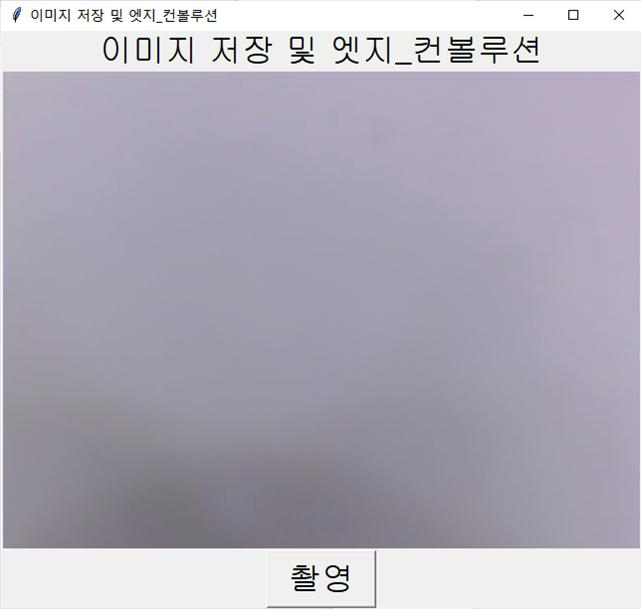

In [89]:
from PIL import Image

image01 = Image.open("image01.jpg")

image01

# 저장된 사진

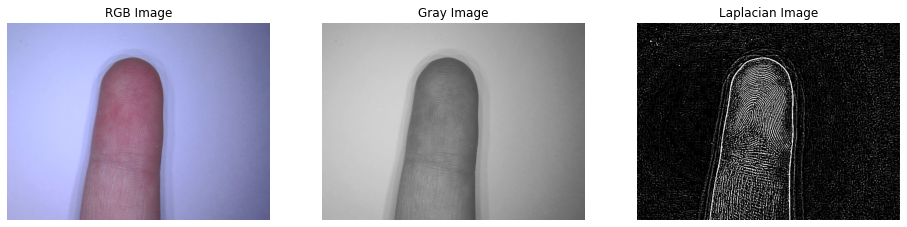

In [88]:
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(16,16))

img1 = cv2.imread('image02.png')
img2 = cv2.imread('image03.png')
img3 = cv2.imread('image04.png')
 
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('RGB Image')
ax1.axis("off")

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('Gray Image')
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.set_title('Laplacian Image')
ax3.axis("off")

plt.show()